In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

sns.set()

In [2]:
data = pd.read_csv("Customers.csv")
data.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [3]:
data.drop(axis = 1, columns = ['CustomerID', 'Profession'], inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  2000 non-null   object
 1   Age                     2000 non-null   int64 
 2   Annual Income ($)       2000 non-null   int64 
 3   Spending Score (1-100)  2000 non-null   int64 
 4   Work Experience         2000 non-null   int64 
 5   Family Size             2000 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 93.9+ KB


In [5]:
data = pd.get_dummies(data, drop_first= True)

In [6]:
data.head()

,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size,Gender_Male
0,19,15000,39,1,4,1
1,21,35000,81,3,3,1
2,20,86000,6,1,1,0
3,23,59000,77,0,2,0
4,31,38000,40,2,6,0


In [7]:
data['Family Size'].value_counts()

2    361
3    311
1    299
4    289
5    258
6    243
7    234
8      4
9      1
Name: Family Size, dtype: int64

array([[<AxesSubplot:title={'center':'Family Size'}>]], dtype=object)

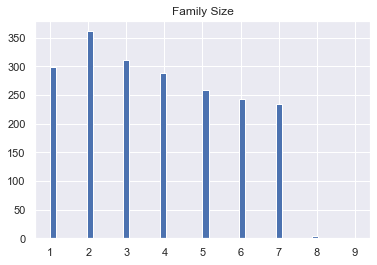

In [11]:
data.hist(column='Family Size', bins = 50)

In [12]:
data.columns

Index(['Age', 'Annual Income ($)', 'Spending Score (1-100)', 'Work Experience',
       'Family Size', 'Gender_Male'],
      dtype='object')

In [14]:
x = data[["Age","Annual Income ($)", "Spending Score (1-100)","Work Experience","Family Size","Gender_Male"]]
y = data['Family Size'].values
y

array([4, 3, 1, ..., 2, 2, 2], dtype=int64)

In [15]:
X = preprocessing.StandardScaler().fit(x).transform(x.astype(float))
X

array([[-1.05408932, -2.09350095, -0.42833854, -0.79120713,  0.11749744,
         1.20706357],
       [-0.98372287, -1.65613312,  1.07554599, -0.28116224, -0.39005088,
         1.20706357],
       [-1.0189061 , -0.54084515, -1.6099621 , -0.79120713, -1.40514752,
        -0.82845678],
       ...,
       [ 1.33836975, -0.43235606, -1.3235079 ,  1.24897242, -0.8975992 ,
         1.20706357],
       [ 0.98653753,  1.56090408, -1.68157565,  0.73892753, -0.8975992 ,
         1.20706357],
       [ 1.44391941, -0.00266404,  0.03714953,  0.22888264, -0.8975992 ,
         1.20706357]])

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (1700, 6) (1700,)
Test set: (300, 6) (300,)


In [17]:
k = 4 
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

In [18]:
yhat = neigh.predict(X_test)
yhat

array([4, 2, 2, 7, 3, 4, 5, 1, 6, 3, 4, 1, 5, 5, 6, 5, 6, 1, 4, 1, 3, 4,
       6, 1, 1, 7, 2, 2, 5, 4, 4, 1, 1, 6, 2, 2, 2, 1, 3, 3, 2, 2, 4, 6,
       5, 3, 2, 1, 3, 2, 7, 2, 1, 5, 2, 4, 2, 2, 7, 6, 4, 6, 2, 2, 1, 5,
       3, 6, 1, 7, 4, 4, 2, 4, 5, 2, 2, 1, 3, 6, 2, 6, 5, 1, 7, 2, 5, 2,
       3, 4, 5, 1, 5, 7, 3, 3, 1, 2, 5, 7, 1, 2, 6, 4, 3, 4, 7, 2, 3, 6,
       7, 1, 2, 1, 3, 5, 1, 3, 1, 7, 2, 1, 7, 2, 2, 4, 2, 3, 5, 6, 1, 2,
       6, 3, 4, 2, 3, 4, 6, 2, 4, 2, 6, 4, 3, 4, 4, 4, 7, 2, 4, 2, 4, 2,
       3, 3, 1, 4, 7, 1, 5, 3, 5, 4, 4, 6, 3, 5, 2, 4, 6, 3, 4, 6, 6, 5,
       4, 1, 4, 5, 5, 5, 7, 2, 1, 2, 3, 4, 5, 3, 7, 2, 3, 7, 2, 1, 4, 4,
       5, 2, 6, 3, 2, 7, 2, 3, 2, 4, 3, 2, 3, 4, 5, 2, 4, 1, 3, 1, 3, 3,
       7, 4, 3, 4, 3, 4, 6, 4, 6, 3, 6, 2, 3, 2, 6, 5, 6, 2, 6, 1, 5, 2,
       1, 2, 2, 7, 4, 3, 2, 6, 6, 5, 4, 1, 6, 6, 5, 5, 2, 3, 4, 1, 6, 7,
       6, 5, 3, 5, 7, 3, 6, 2, 4, 4, 1, 2, 2, 3, 4, 1, 4, 7, 2, 6, 2, 1,
       3, 6, 2, 1, 4, 1, 5, 4, 3, 6, 6, 3, 4, 1], d

In [20]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.8076470588235294
Test set Accuracy:  0.59


In [21]:
k = 6
neigh6 = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat6 = neigh6.predict(X_test)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh6.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat6))

Train set Accuracy:  0.7511764705882353
Test set Accuracy:  0.5733333333333334


In [22]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.66666667, 0.58333333, 0.55666667, 0.59      , 0.62333333,
       0.57333333, 0.59666667, 0.61333333, 0.59      ])

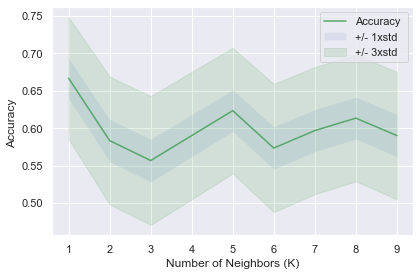

In [25]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.show()

In [26]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.6666666666666666 with k= 1
